Part a

Starting it with Newton's Second Law

$\sum \vec{F} = m \vec{a}$

We can see

$\sum F_x \hat i + F_y \hat j = m (a_{x} \hat i +a_{y} \hat j ) $

In the x direction only force is that of the air resistance, so

$\sum F_x = m a_{x} = - \frac{1}{2} \pi R^2 \rho C v^2 \hat v_x$

In the y direction we have the force of the air resistance and taht of gravitty, so

$\sum F_y = m a_{y} = - mg - \frac{1}{2} \pi R^2 \rho C v^2 \hat v_y$

Lets look at the x direction:

$\sum \vec{F_x} = m \vec{a_{x}} = - \frac{1}{2} \pi R^2 \rho C v^2 \hat v_x$

$v^2 = \lvert v \rvert^2 = \Big(\sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}\bigg)^2 = (\frac{dx}{dt})^2+(\frac{dy}{dt})^2$

and 

$\hat v_x = \frac{\vec v_x}{\sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}}$

Now 

$m \vec{a_{x}} = - \frac{1}{2} \pi R^2 \rho C (\frac{dx}{dt})^2+(\frac{dy}{dt})^2 \frac{\vec v_x}{\sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}} = - \frac{1}{2} \pi R^2 \rho C \vec v_x \sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2} $

Now lets look at the y direction

$\sum \vec{F_y} = m \vec{a_{y}} = -mg - \frac{1}{2} \pi R^2 \rho C v^2 \hat v_y$

$v^2 = \lvert v \rvert^2 = \Big(\sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}\bigg)^2 = (\frac{dx}{dt})^2+(\frac{dy}{dt})^2$

and 

$\hat v_y = \frac{\vec v_y}{\sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}}$

Now 

$m \vec{a_{y}} = - mg - \frac{1}{2} \pi R^2 \rho C (\frac{dx}{dt})^2+(\frac{dy}{dt})^2 \frac{\vec v_y}{\sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}} = - mg - \frac{1}{2} \pi R^2 \rho C \vec v_y \sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2} $

Therefore,

$a_{y} = - g - \frac{\pi R^2 \rho C}{2 m}  v_y \sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}$

$a_{x} = - \frac{\pi R^2 \rho C}{2 m}  v_x \sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}$

or in terms of $r$

$\frac{d^2y}{dt^2} = - g - \frac{\pi R^2 \rho C}{2 m}  \frac{dy}{dt} \sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}$

$\frac{d^2x}{dt^2} = - \frac{\pi R^2 \rho C}{2 m}  \frac{dx}{dt} \sqrt{(\frac{dx}{dt})^2+(\frac{dy}{dt})^2}$

Part b

For the x direcetion let $\frac{dx}{dt} = v_x$

Then 

$\frac{dx}{dt} = v_x$

$\frac{dv_{x}}{dt} = - \frac{\pi R^2 \rho C}{2 m}  v_x \sqrt{(v_x)^2+(v_y)^2}$

For the y direcetion let $\frac{dy}{dt} = v_y$

Then 

$\frac{dy}{dt} = v_y$

$\frac{dv_{y}}{dt} = - g - \frac{\pi R^2 \rho C}{2 m}  v_y \sqrt{(v_x)^2+(v_y)^2}$

Now instead of to second order differntial equations, we have four first order differential equations.

In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [38]:
def XDrag(R,p,c,m,vx,vy):
    return((-1.0)*(np.pi*R**2*p*c*vx*np.sqrt(vx**2+vy**2))/(2*m))

In [39]:
def YDrag(R,p,c,m,vx,vy):
    return((-1.0)*((np.pi*R**2*p*c*vy*np.sqrt(vx**2+vy**2))/(2*m)))

In [40]:
def CannonBallMotionEuler(R, p, c, g, numberoftimesteps, h, N, massprime, Pos, Vel):
    """
    This funstion calculates the trajectory of a mass through the air, where the force of air resistance it taken in to acount.
    The function Fills the array's Pos and Vel passed to it, with  the approprarte postions and Velocities. (Pos for positions and Vel for velocities.)
    The individual who wrote this function chose Euler's method over a high order integrater like Runge-Kutta 4, because 
        Euler's method returned a more accurate value for the acceleration at termeinal velocity with less computation.
    Along with filling the arrays Pos and Vel, this function returns When the Ball hits the ground, The Total Distance the Ball travel along the path,
    and the Distance Travel in only the x direction. 
    """
    
    TotalDistanceTraveled = 0
    DistanceInXDirection = 0
    WhenBallHitsGround = 0
    for n in range(numberoftimesteps-1):
        for l in range(N):
            vx = Vel[l][0][n]
            vy = Vel[l][1][n]

            Vel[l][0][n+1] = Vel[l][0][n] + h*(XDrag(R,p,c,massprime,vx,vy))
            Vel[l][1][n+1] = Vel[l][1][n] + h*(-g+YDrag(R,p,c,massprime,vx,vy))

            Pos[l][0][n+1] = Pos[l][0][n] + h*Vel[l][0][n]
            Pos[l][1][n+1] = Pos[l][1][n] + h*Vel[l][1][n]
            
            TotalDistanceTraveled = TotalDistanceTraveled + np.sqrt((Pos[l][0][n+1]-Pos[l][0][n])**2+(Pos[l][1][n+1]-Pos[l][1][n])**2)
        
            if (Pos[l][1][n] <= 0) and (WhenBallHitsGround == 0):
                WhenBallHitsGround = int(n)
                DistanceInXDirection = Pos[l][0][n]
    if WhenBallHitsGround == 0:
        WhenBallHitsGround = numberoftimesteps
    return(WhenBallHitsGround, TotalDistanceTraveled, DistanceInXDirection)

In [41]:
#Given in problem
DensityOfBall = (11.3/1000)*(100)**3 #kg/m^3
R = 0.06 #Radius of ball in m
Angle = np.radians(38) #Firing angle of cannon
yo = 12 #Starting y heights in m
vo = 110 #Initial velocity in m/s
p = 1.19 #Density of Air kg/m^3
C = 0.47 # drag coefficient

In [42]:
N = 1 #Number of bodies
numberoftimesteps = 100000
time = 100 #The amount of time the simulation runs
h = time/numberoftimesteps

M = DensityOfBall*(4/3)*np.pi*R**3 #Mass of the Ball
g = 9.81 #Acceleeration due to gravity Cloase to Earths Surface in m/s^2

Pos = np.empty([N,2,numberoftimesteps])
Vel = np.empty([N,2,numberoftimesteps])

Pos[0][0][0] = 0.0 #Initail location in x
Pos[0][1][0] = yo #Initail location in y

Vel[0][0][0] = vo*np.cos(Angle) #Initail speed in x
Vel[0][1][0] = vo*np.sin(Angle) #Initail speed in y

In [43]:


WhenBallHitsGround, TotalDistanceTraveled, DistanceInXDirection = CannonBallMotionEuler(R, p, C, g, numberoftimesteps, h, N, M, Pos, Vel)

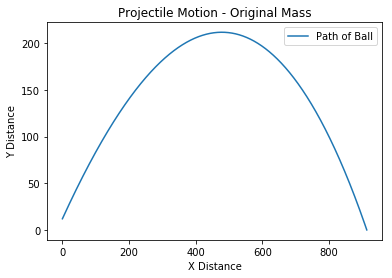

The total distance traveled along the path, 13948.77 meter
The distance trael in the x direction, 913.92 meter


In [55]:
plt.plot(Pos[0][0][:WhenBallHitsGround],Pos[0][1][:WhenBallHitsGround], label = "Path of Ball")
plt.xlabel("X Distance")
plt.ylabel("Y Distance")
plt.title("Projectile Motion - Original Mass")
plt.legend()
plt.show()

print("The total distance traveled along the path, "+str(np.round(TotalDistanceTraveled,2))+" meter")
print("The distance trael in the x direction, "+str(np.round(DistanceInXDirection,2))+" meter")

Part c)

Now experiment with different projectile materials to determine which would fire the
farthest, produce plots and comparisons. Explain your findings.

$(W)$ ${\rho}$ = 19.3 $\frac{g}{cm^3}$

$(Ni)$ ${\rho}$ = 8.9 $\frac{g}{cm^3}$  

In [45]:
#Given in problem
DensityOfBall = [(19.3/1000)*(100)**3, (8.9/1000)*(100)**3] #kg/m^3
BallMaterial = [["Tungston","Nickel"],["r","g"]] #An array taht holdes the materials name and the assciated color for plotting
R = 0.06 #Radius of ball in m
Angle = np.radians(38) #Firing angle of cannon
yo = 12 #Starting y heights in m
vo = 110 #Initial velocity in m/s
p = 1.19 #Density of Air kg/m^3
C = 0.47 # drag coefficient

In [46]:
N = 1 #Number of bodies
numberoftimesteps = 100000
time = 100 #The amount of time the simulation runs
h = time/numberoftimesteps

g = 9.81 #Acceleeration due to gravity Cloase to Earths Surface in m/s^2

Pos = np.empty([N,2,numberoftimesteps])
Vel = np.empty([N,2,numberoftimesteps])
Distances = np.empty([len(DensityOfBall),2])

Pos[0][0][0] = 0.0 #Initail location in x
Pos[0][1][0] = yo #Initail location in y

Vel[0][0][0] = vo*np.cos(Angle) #Initail speed in x
Vel[0][1][0] = vo*np.sin(Angle) #Initail speed in y

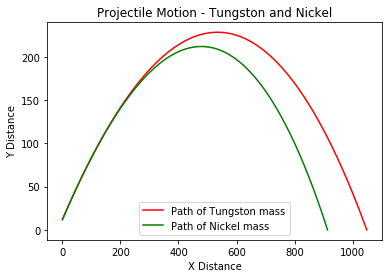



The total distance traveled along the path by Tungston, 19034.2 meter
The distance trael in the x direction by Tungston, 1049.06 meter


The total distance traveled along the path by the Nickel mass, 13948.77 meter
The distance trael in the x direction by the Nickel mass, 913.92 meter


In [56]:
for i in range(len(DensityOfBall)):
    M = DensityOfBall[i]*(4/3)*np.pi*R**3
    WhenBallHitsGround, TotalDistanceTraveled, DistanceInXDirection = CannonBallMotionEuler(R, p, C, g, numberoftimesteps, h, N, M, Pos, Vel)
    Distances[i][0] = TotalDistanceTraveled
    Distances[i][1] = DistanceInXDirection
    plt.plot(Pos[0][0][:WhenBallHitsGround],Pos[0][1][:WhenBallHitsGround],label = ("Path of "+str(BallMaterial[0][i])+" mass"), color = BallMaterial[1][i])

plt.xlabel("X Distance")
plt.ylabel("Y Distance")
plt.title("Projectile Motion - Tungston and Nickel")
plt.legend()
plt.show()
print("\n")
print("The total distance traveled along the path by "+str(BallMaterial[0][0])+", "+str(np.round(Distances[0][0],2))+" meter")
print("The distance trael in the x direction by "+str(BallMaterial[0][0])+", "+str(np.round(Distances[0][1],2))+" meter")
print("\n")
print("The total distance traveled along the path by the "+str(BallMaterial[0][1])+" mass, "+str(np.round(Distances[1][0],2))+" meter")
print("The distance trael in the x direction by the "+str(BallMaterial[0][1])+" mass, "+str(np.round(Distances[1][1],2))+" meter")

The Tungston ball travels further than the Nickel ball.

This makes since, because the balls are the sane size the same they will experiacne the same amout of air drag.

But to to Tungston great density, the ball of tungstaon has more mass and therefore more initial kinetic energy.

For Tunsgton:

In [52]:
InitailKineticEnergy = 1/2*DensityOfBall[0]*(4/3)*np.pi*R**3*Vel[0][0][0]**2
print(InitailKineticEnergy)

65602.34025549243


For Nickel:

In [53]:
InitailKineticEnergy = 1/2*DensityOfBall[1]*(4/3)*np.pi*R**3*Vel[0][1][0]**2
print(InitailKineticEnergy)

18465.9518653244


This greater initial energy allows the tungston ball to travel further.